In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.morphology import skeletonize, binary_erosion, binary_opening, area_opening, binary_dilation, binary_closing, binary_opening, remove_small_holes, remove_small_objects
from matplotlib import rcParams
import skimage.io
from skimage.filters import threshold_minimum, gaussian
import DSE_prune
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage.exposure import equalize_adapthist, equalize_hist, rescale_intensity

THRESHOLD = 100
MAX_PIXEL_VALUE = 255

plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (20, 15)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
# rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20

rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

In [2]:
def cortar(frame, limites, PRUEBA=False, nombre='CORTE'):
    # lee en gris
    min_x, max_x, min_y, max_y = limites
    corte = frame[min_y:max_y, min_x:max_x] # resolver lo del corte binarizadp
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', corte)
    return corte

def gris(frame, PRUEBA=False, nombre='GRAYSCALE'):
    im_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', im_gray)
    return im_gray

def binarize(frame, th=THRESHOLD, PRUEBA=False, nombre='BINARY'):
    _, im_binary = cv.threshold(frame, th, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', im_binary)
    return im_binary

def skeleton(frame, PRUEBA=False, nombre='ESQUELETO'):
    arr = frame < 255 #Convert frame to binary mask of 1's and 0's
    sk = skeletonize(arr)*255 #We apply skeletonize to boolean mask and upscale 1's to 255 (white)
    # esto cierra los globitos, es lo que faltaba antes:
    # for c in np.unique(x):
    #     r = np.where(sk[:, c]!=0)[0]
    #     for p in r:
    #         sk[p, c] = 0
    #     sk[int(np.mean(r)), c] = 255
    tail = np.where(sk!=0)
    if PRUEBA:
        cv.imwrite(f'{nombre}.jpg', sk)
    return sk, tail

# Pruebas de una captura y un video

In [4]:
FILENAME = '2V-15Hz'

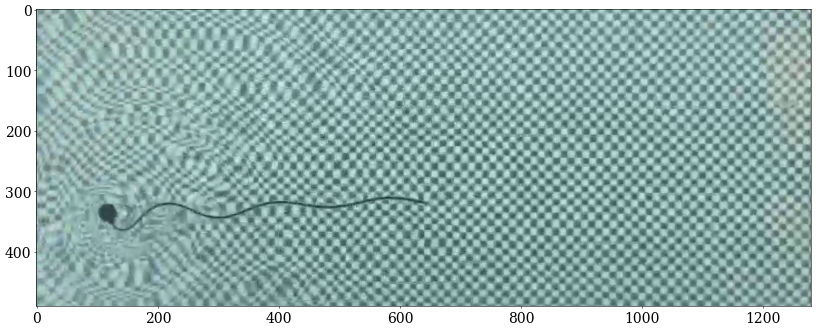

In [19]:
im = skimage.io.imread('fotos\\capturas calibracion\\captura-2V-15Hz.tiff')
plt.imshow(im)
im_copy = im.copy() 

## Cabeza

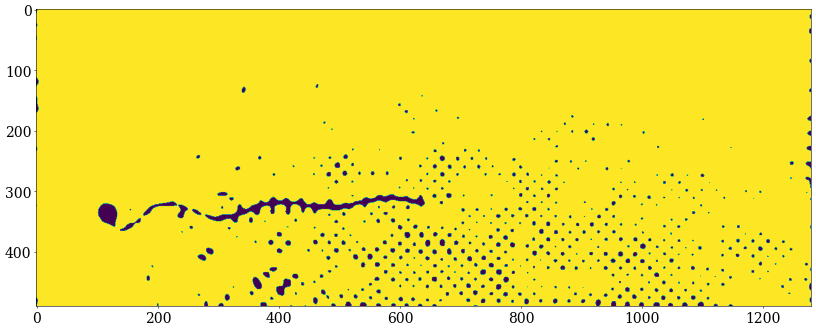

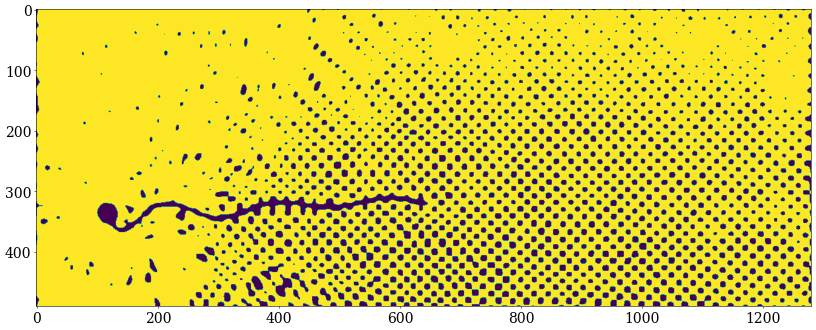

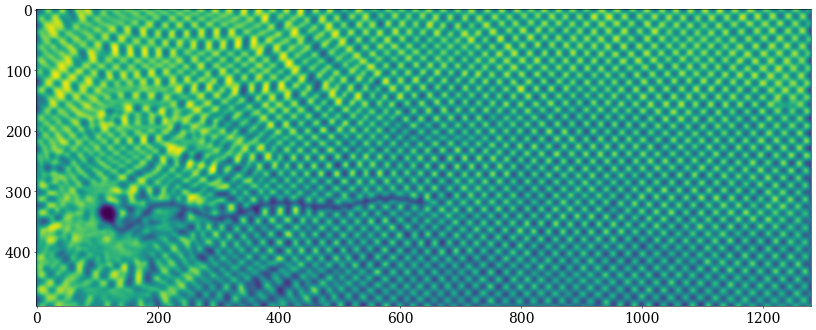

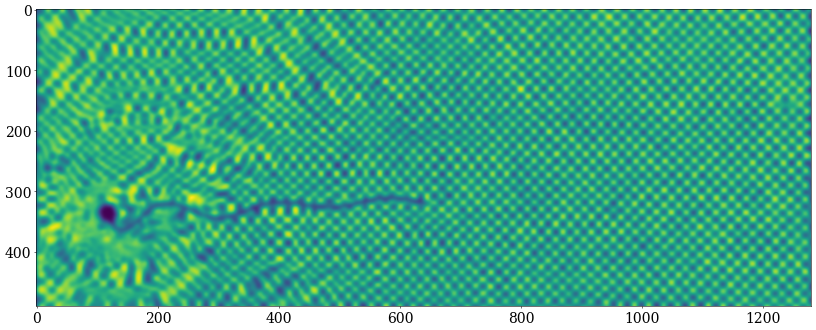

In [11]:
head_gray = gris(im)

head_gaussian = gaussian(head_gray, 3)

p2, p98 = np.percentile(head_gaussian, (1, 50))
img_rescale = rescale_intensity(head_gaussian, in_range=(p2, p98))

img_hist_eq = equalize_hist(head_gray)

img_clahe = equalize_adapthist(head_gray)

head_gaussian = gaussian(img_rescale, 3)

head_binary = head_gaussian>0.5



# plt.figure()
# plt.imshow(head_gray>128)

plt.figure()
plt.imshow(head_gaussian>0.4)

plt.figure()
plt.imshow(img_rescale>0.5)

plt.figure()
plt.imshow(gaussian(img_hist_eq, 4))

plt.figure()
plt.imshow(gaussian(img_clahe, 4))

In [38]:
print(head_binary)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False  True ...  True  True  True]
 [False False  True ...  True  True  True]
 [False False  True ...  True  True  True]]


[7.0, 19.0, 9.0, 2.0, 26.0, 8.0, 7.0, 16.0, 6.0, 20.0, 9.0, 5.0, 12.0, 7.0, 8.0, 1.0, 6.0, 7.0, 1.0, 29.0, 9.0, 2.0, 15.0, 19.0, 11.0, 8.0, 4.0, 2.0, 16.0, 19.0, 59.0, 6.0, 23.0, 5.0, 20.0, 13.0, 10.0, 17.0, 5.0, 1.0, 13.0, 10.0, 6.0, 11.0, 4.0, 29.0, 8.0, 20.0, 7.0, 20.0, 13.0, 3.0, 41.0, 16.0, 13.0, 23.0, 13.0, 10.0, 14.0, 19.0, 1.0, 13.0, 11.0, 39.0, 4.0, 10.0, 7.0, 14.0, 13.0, 2.0, 12.0, 11.0, 14.0, 31.0, 23.0, 6.0, 1.0, 9.0, 30.0, 14.0, 11.0, 2.0, 4.0, 5.0, 39.0, 3.0, 8.0, 1.0, 24.0, 15.0, 13.0, 5.0, 8.0, 16.0, 4.0, 11.0, 13.0, 6.0, 7.0, 35.0, 4.0, 8.0, 24.0, 21.0, 23.0, 36.0, 18.0, 29.0, 18.0, 23.0, 42.0, 35.0, 4.0, 9.0, 25.0, 14.0, 22.0, 2.0, 2.0, 31.0, 26.0, 17.0, 4.0, 20.0, 9.0, 38.0, 12.0, 38.0, 28.0, 14.0, 31.0, 24.0, 33.0, 43.0, 33.0, 14.0, 23.0, 8.0, 1.0, 4.0, 24.0, 24.0, 29.0, 9.0, 16.0, 9.0, 2.0, 17.0, 5.0, 6.0, 14.0, 10.0, 18.0, 13.0, 2.0, 34.0, 22.0, 18.0, 2.0, 35.0, 49.0, 15.0, 14.0, 18.0, 23.0, 33.0, 36.0, 4.0, 41.0, 24.0, 21.0, 24.0, 6.0, 20.0, 32.0, 38.0, 11.0, 16.

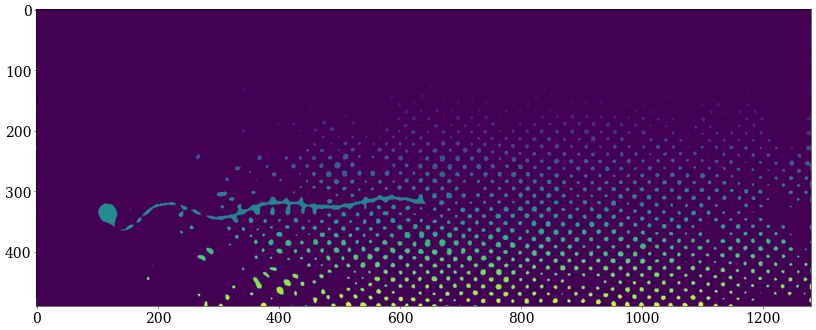

In [539]:
labeled_head = label(1-head_binary, connectivity=1)
regions = regionprops(labeled_head)

object_features = skimage.measure.regionprops(labeled_head)
object_areas = [objf["area"] for objf in object_features]
print(object_areas)
print(sorted(object_areas, reverse=True))
n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)[:2]][0]
plt.figure()
plt.imshow(labeled_head)
print(sorted(object_areas, reverse=True)[:2])
print(object_areas[n])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


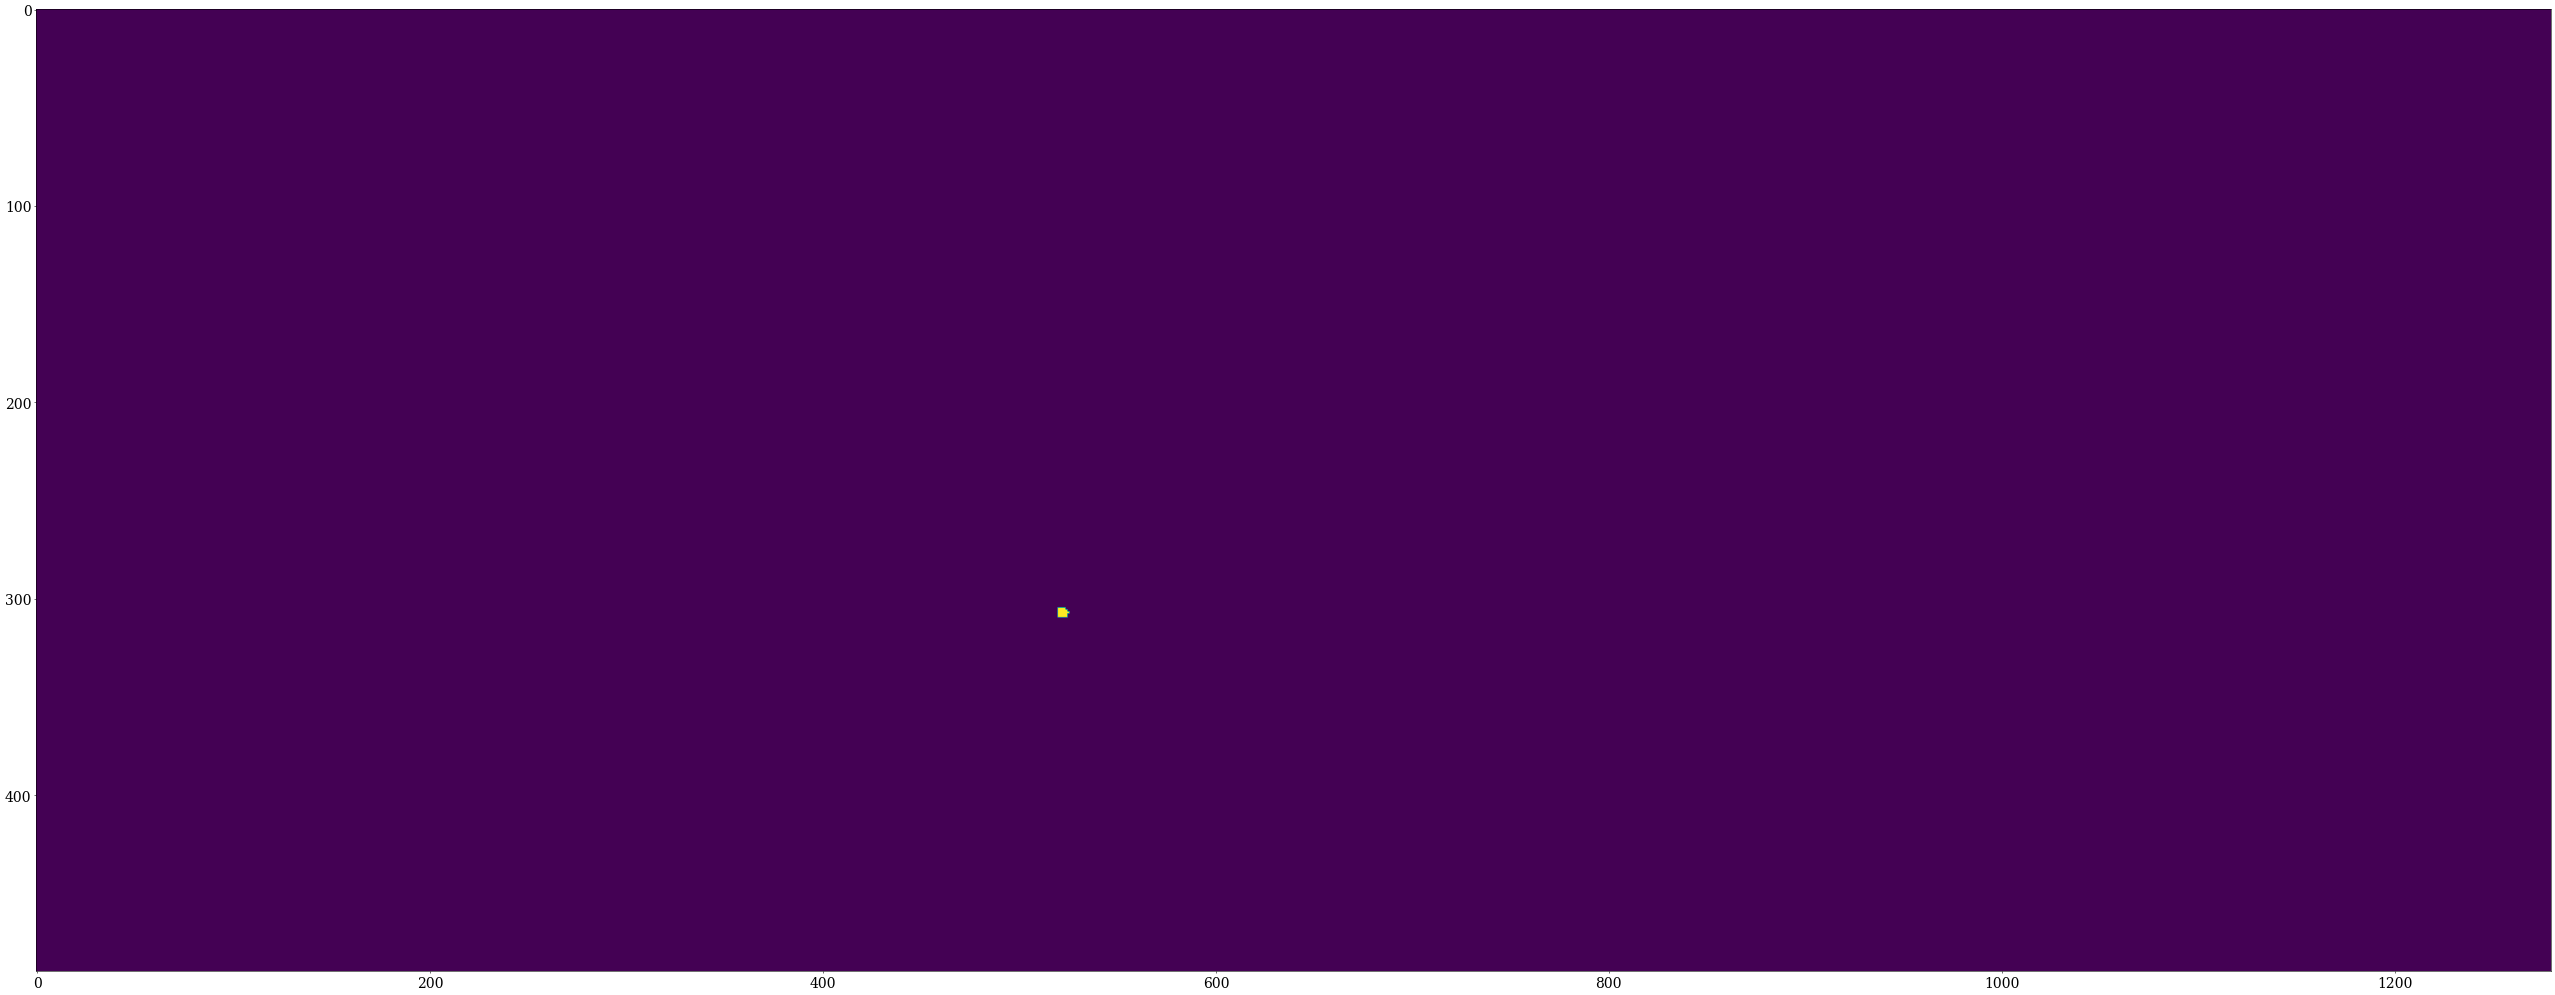

In [ ]:
head_mask = np.zeros_like(labeled_head)
head_mask += (labeled_head==n+1).astype(int)
head_area  =  head_mask

print(head_area)
plt.figure(figsize=(300, 25))
plt.imshow(head_area)


True


C:\Users\pauli\AppData\Local\Temp\ipykernel_31652\2602144181.py:1: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  head_area_gauss = remove_small_holes(head_area)


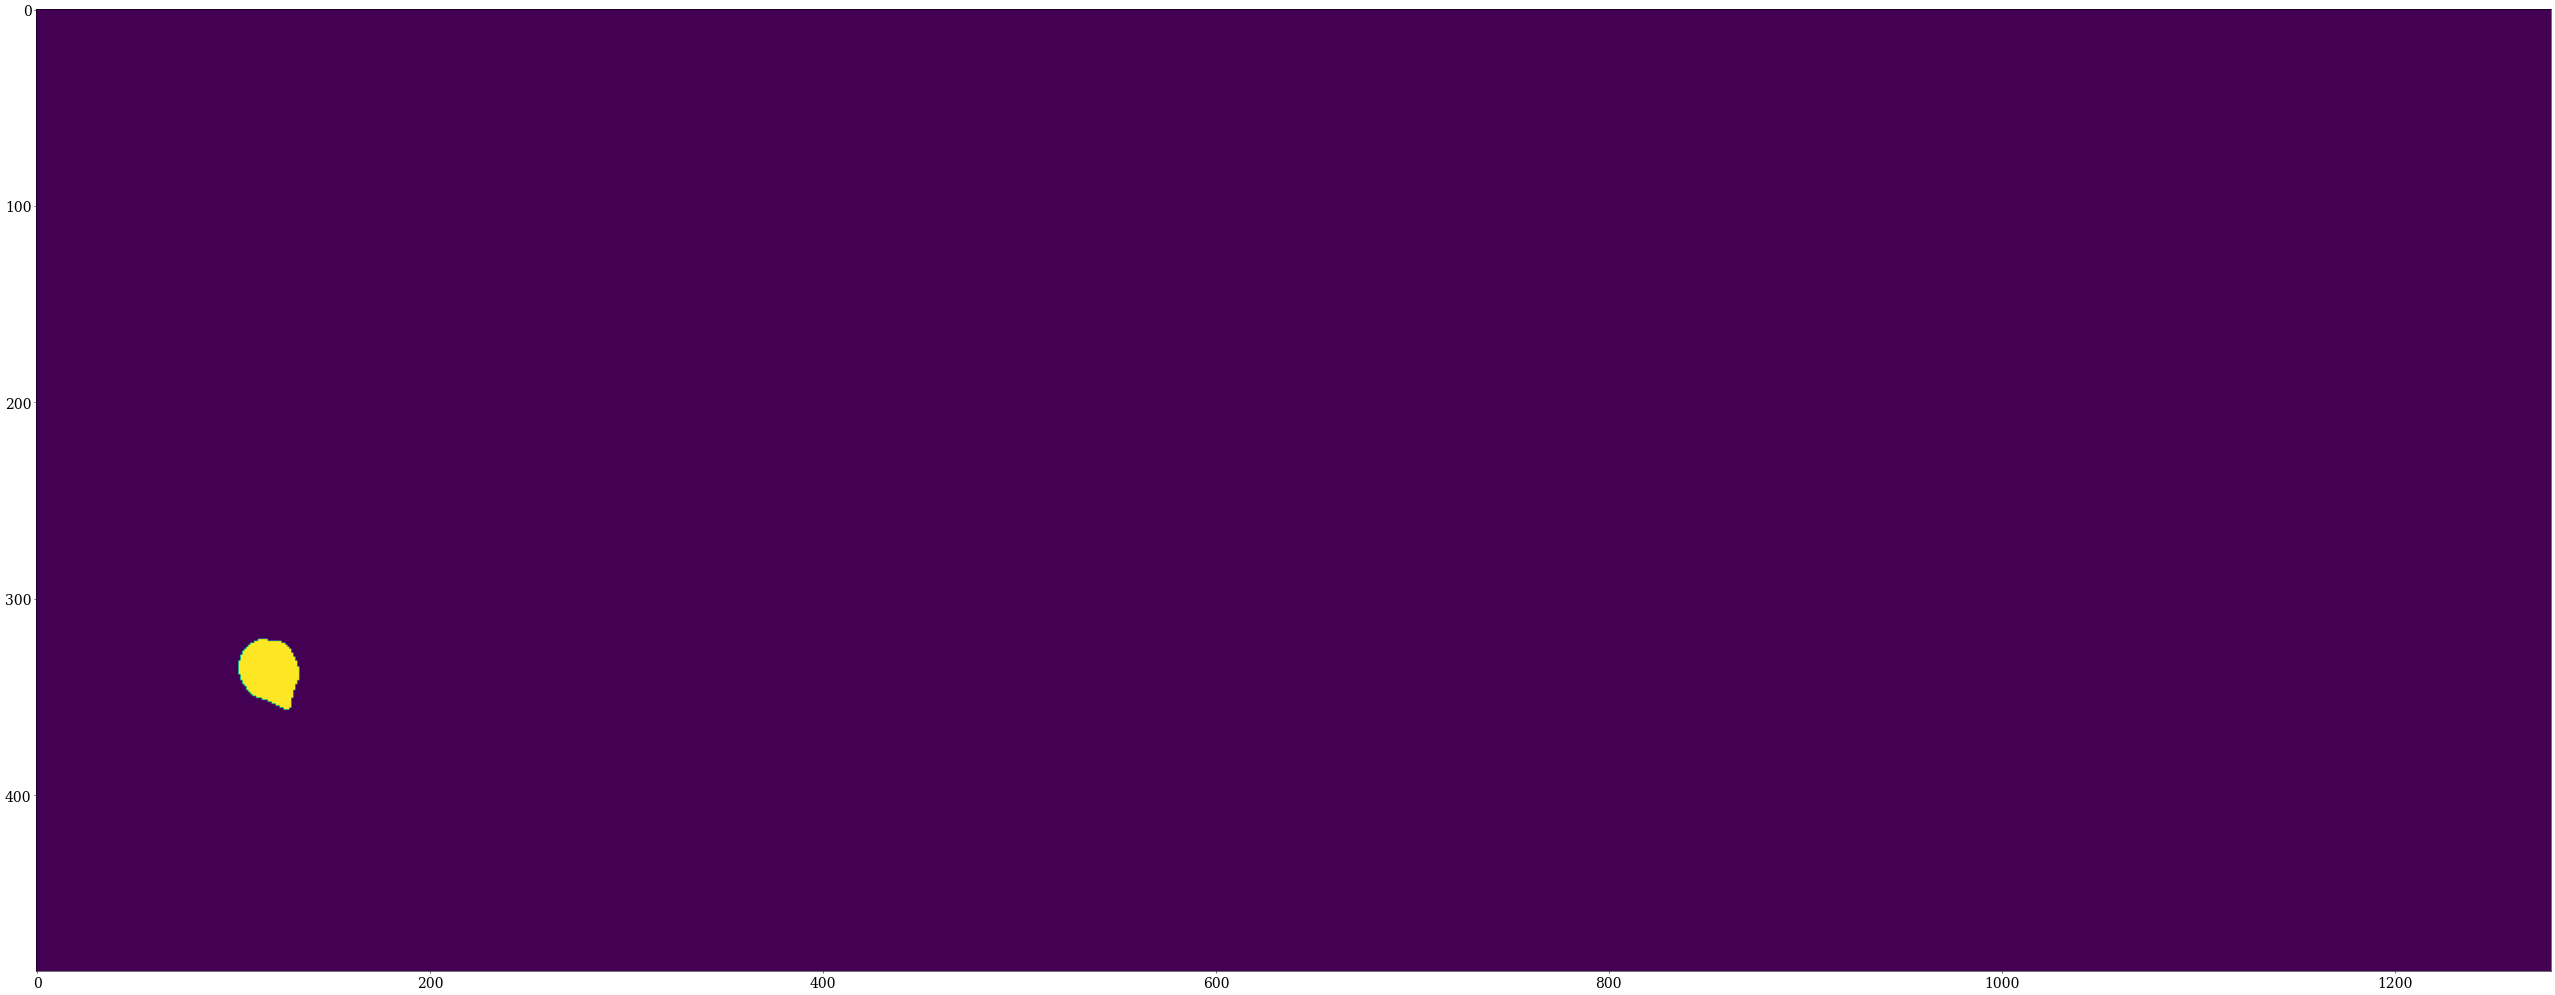

In [430]:
head_area_gauss = remove_small_holes(head_area)
# head_area_bin = binarize(head_area_gauss, np.max(head_area)///2)
# head_area = cv.bitwise_not(head_area)
print(np.max(head_area_gauss))
plt.figure(figsize=(300, 25))
plt.imshow(head_area_gauss)

In [17]:
limites = [0, 1280, 110, 600]
filename = '2V-15Hz'

vs = cv.VideoCapture(f'videos\\FCD\\P1\\telgopor\\P1-{filename}-60mm.mp4')

p2, p98 = np.percentile(head_gray, (2, 98))
img_rescale = rescale_intensity(head_gray, in_range=(p2, p98))

i = 0
while(vs.isOpened()):
    ret, frame = vs.read()
    if ret:
        frame = cortar(frame, limites)
        frame_gray = gris(frame)
        frame_rescale = rescale_intensity(frame_gray, in_range=(p2, p98))
        frame_gaussian = gaussian(frame_gray, 3)
        frame_binary = frame_rescale>0.5
        # frame_binary = binary_opening(frame_binary)
        # head_gaussian = (gaussian(head_gray, 5)*255).astype('uint8')
        # frame_binary = cv.adaptiveThreshold(frame_gaussian,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,19,7)

        labeled_frame, count = label(1-frame_binary, connectivity=1, return_num=True)
        # regions = regionprops(labeled_frame)
        object_features = skimage.measure.regionprops(labeled_frame)
        object_areas = [objf["area"] for objf in object_features]
        # print(object_areas)
        n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)][0]

        mask = np.zeros_like(labeled_frame)
        mask += (labeled_frame==n+1).astype(int)
        frame_area1  =  mask
        
        # frame_area1 = binary_erosion(binary_erosion(frame_area1))

        y, x = np.where(frame_area1!=0)

        frame[y, x] = [0, 255, 0]
        # frame[y_sk, x_sk] = [255,0,0]
        # frame = cv.circle(frame, (int(origin[0]), int(origin[1])), radius=2, color=(0, 0, 255), thickness=-1)
        # frame = cv.circle(frame, (int(x_head), int(y_head)), radius=2, color=(0, 0, 0), thickness=-1)
        
        cv.imshow('frame', frame)
        i+=1
        if cv.waitKey(1) & 0xFF == ord('q'):
                break
    else:
            break
cv.destroyAllWindows()
vs.release()


        

## Cuerpo

float64


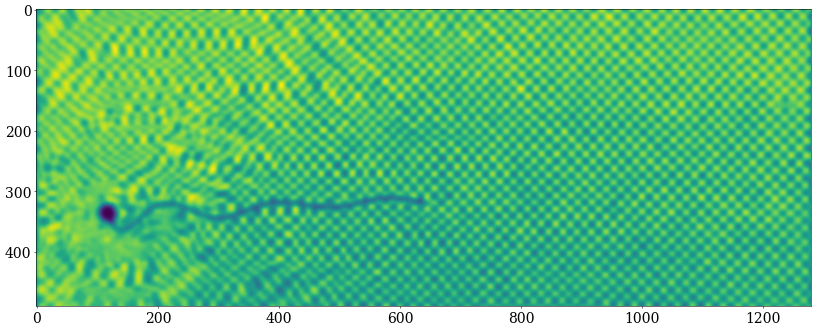

In [20]:
# ref_sobel = sobel(im)
ref_gray = gris(im)

ref_gaussian = gaussian(ref_gray, 4)*255

print(ref_gaussian.dtype)

plt.figure()
plt.imshow(ref_gaussian)
# plt.colorbar()


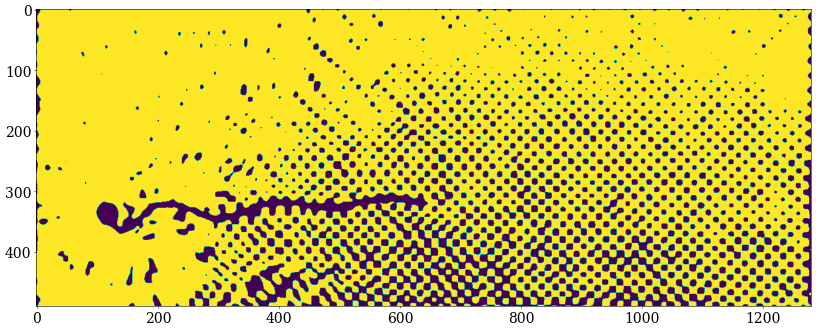

In [21]:
ref_binary = binarize(ref_gaussian, th=150)
# ref_binary = cv.adaptiveThreshold(ref_gaussian,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,21,5)
# ref_binary = cv.adaptiveThreshold(ref_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,5,2)

# ref_gaussian = (gaussian(ref_gray, 4)*255).astype('uint8')


plt.figure()
plt.imshow(ref_binary)

y, x = np.where(ref_binary!=0)
# y_sk, x_sk = np.where(ref_DSE!=0)
# im_copy[y,x] = [0, 255, 0]
# plt.imshow(im_copy)

[191.0, 507641.0, 7.0, 34.0, 2.0, 10.0, 2.0, 2.0, 7.0, 7.0, 23.0, 12.0, 23.0, 1.0, 3.0, 1.0, 6.0, 8.0, 3.0, 10.0, 3.0, 16.0, 6.0, 22.0, 10.0, 1.0, 5.0, 3.0, 2.0, 7.0, 15.0, 9.0, 52.0, 29.0, 32.0, 42.0, 28.0, 26.0, 27.0, 6.0, 12.0, 7.0, 7.0, 11.0, 26.0, 32.0, 3.0, 3.0, 61.0, 26.0, 9.0, 5.0, 35.0, 6.0, 2.0, 36.0, 9.0, 60.0, 4.0, 13.0, 24.0, 12.0, 14.0, 27.0, 7.0, 15.0, 29.0, 13.0, 4.0, 15.0, 19.0, 7.0, 4.0, 35.0, 9.0, 9.0, 24.0, 12.0, 18.0, 10.0, 64.0, 18.0, 17.0, 11.0, 33.0, 14.0, 6.0, 2.0, 28.0, 21.0, 78.0, 17.0, 34.0, 4.0, 19.0, 30.0, 31.0, 2.0, 4.0, 15.0, 1.0, 12.0, 12.0, 25.0, 5.0, 32.0, 32.0, 8.0, 93.0, 28.0, 34.0, 2.0, 23.0, 30.0, 21.0, 23.0, 10.0, 1.0, 10.0, 19.0, 10.0, 1.0, 5.0, 4.0, 54.0, 4.0, 53.0, 2.0, 13.0, 17.0, 12.0, 17.0, 1.0, 4.0, 5.0, 25.0, 2.0, 19.0, 14.0, 2.0, 39.0, 27.0, 13.0, 34.0, 2.0, 12.0, 22.0, 13.0, 2.0, 9.0, 17.0, 18.0, 18.0, 19.0, 18.0, 1.0, 4.0, 15.0, 16.0, 6.0, 21.0, 36.0, 34.0, 13.0, 15.0, 35.0, 3.0, 16.0, 42.0, 21.0, 15.0, 40.0, 21.0, 25.0, 37.0, 110.0, 4

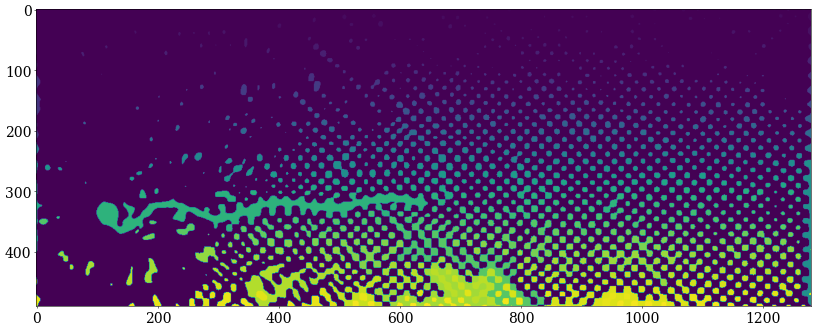

In [22]:
# ref_clear = binary_erosion(ref_binary)
# # ref_clear = binary_erosion(ref_clear)
# ref_clear_mask = 1-binary_opening(ref_clear)
# ref_clear = ref_clear_mask*255
# # ref_clear = cv.bitwise_not(ref_clear)

labeled_image = label(1-ref_binary, connectivity=1)
regions = regionprops(labeled_image)

object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
print(object_areas)
print(object_areas[15])
n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)[:2]][1]
plt.figure()
plt.imshow(labeled_image)
print(sorted(object_areas, reverse=True)[:2])
print(object_areas[n])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


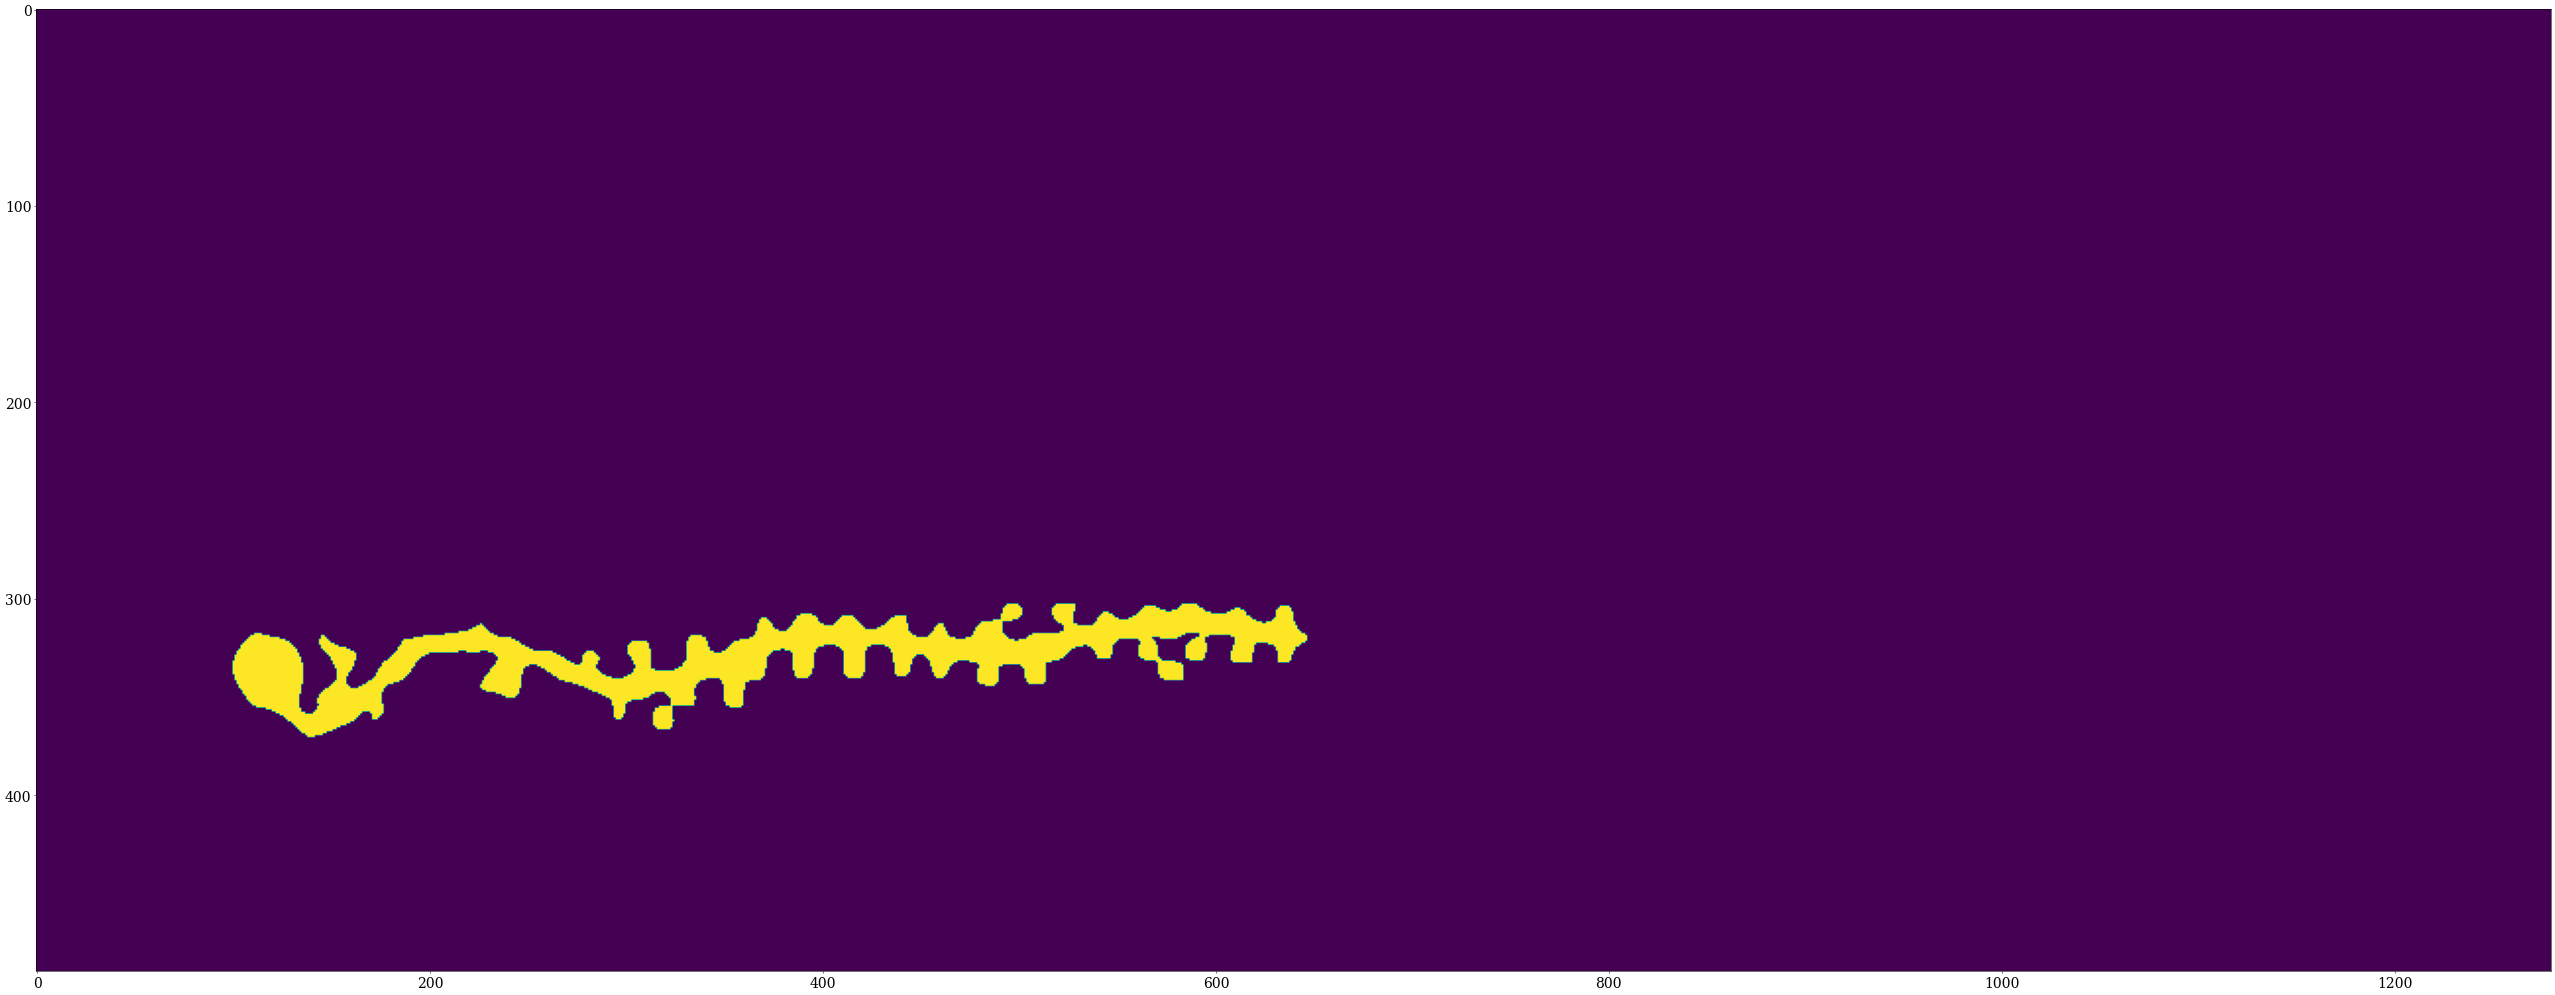

In [23]:
mask = np.zeros_like(labeled_image)
mask += (labeled_image==n+1).astype(int)
area  =  mask

print(area)
plt.figure(figsize=(300, 25))
plt.imshow(area)

# cv.imwrite('binary.tiff', area)

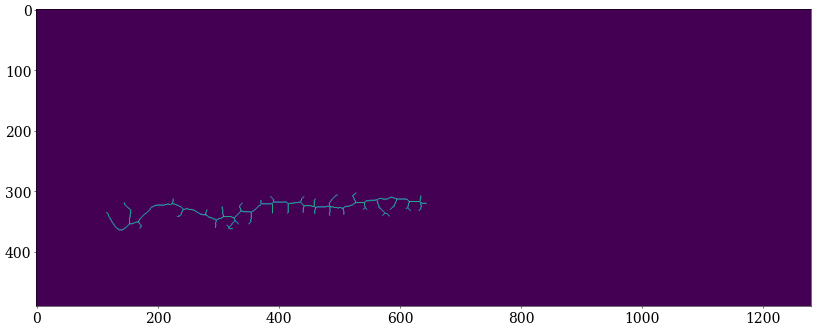

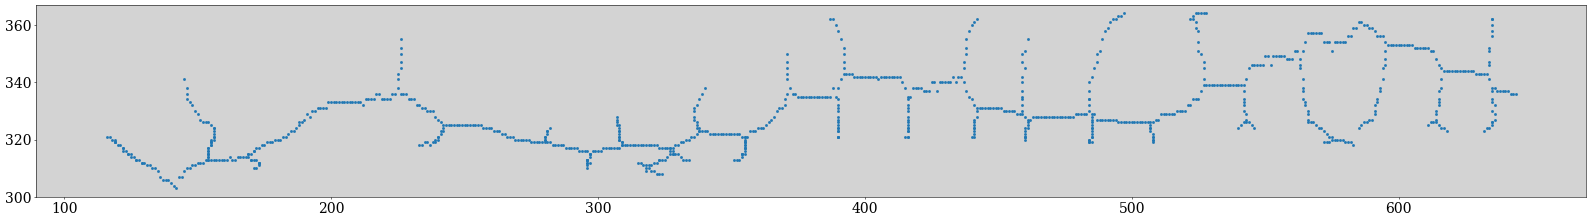

In [60]:
# ref_sk = skeletonize(area)
# plt.figure()
# plt.imshow(ref_sk)

ref_sk, dist = skimage.morphology.medial_axis(area, return_distance=True)
plt.figure()
plt.imshow(ref_sk)

y, x = np.where(ref_sk!=0)

plt.figure(figsize=(40, 5))
plt.plot(x, y[::-1], '.')

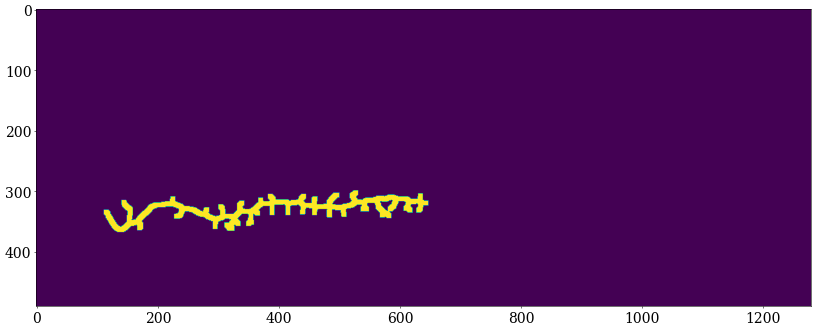

In [41]:
from scipy.signal import medfilt2d
from scipy.ndimage import median_filter, convolve

def moving_average(x, w):
    return convolve(x, np.ones((w, w))) / w


m = moving_average(ref_sk, 8)
plt.figure()
plt.imshow(m)

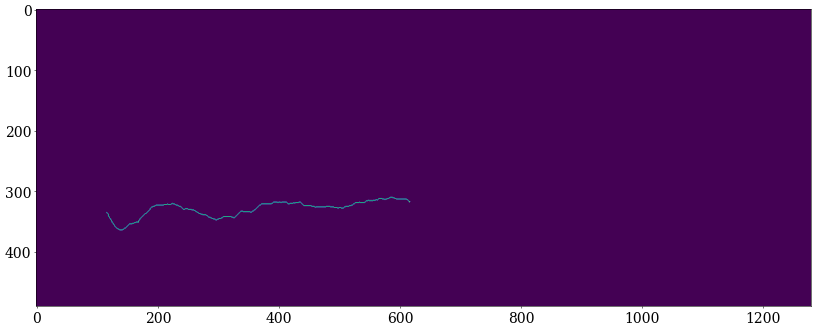

In [45]:
ref_DSE = DSE_prune.skel_pruning_DSE(ref_sk, dist, 400)
plt.figure()
plt.imshow(ref_DSE)

In [4]:
from skimage.morphology import binary_dilation

In [61]:
im_copy = im.copy()
y, x = np.where(area!=0)
y_h, x_h = np.where(frame_binary!=0)
y_sk, x_sk = np.where(ref_DSE!=0)

line_th = skimage.morphology.thin(area)
y_t, x_t = np.where(line_th!=0) 
line_sk = skimage.morphology.skeletonize(area)
y_k, x_k = np.where(line_sk!=0)

im_copy[y, x] = [255,255,255]
im_copy[y_h, x_h] = [255,0,0]
im_copy[y_sk, x_sk] = 0
# im_copy[y_k, x_k] = [0,0,255]
# im_copy[y_t, x_t] = [255,0,0]
plt.figure(figsize=(300, 25))
plt.imshow(im_copy)

NameError: name 'frame_binary' is not defined

## Rotación

In [3]:
# import math
from scipy.ndimage import rotate
from PIL import Image 

In [4]:
def rotate_point(x, y, angle, center_point):
    """ Rotate a point around the origin by a given angle. """
    angle_rad = np.radians(angle)
    x -= center_point[0]
    y -= center_point[1]

    x_new = x * np.cos(angle_rad) - y * np.sin(angle_rad) + center_point[0]
    y_new = x * np.sin(angle_rad) + y * np.cos(angle_rad) + center_point[1]
    return x_new, y_new

def rotate_curve(x, y, angle, center_point):    
    # Rotate points
    x_rotated, y_rotated = [], []
    for xi, yi in zip(x, y):
        x_rot, y_rot = rotate_point(xi, yi, -angle, center_point)
        x_rotated.append(x_rot)
        y_rotated.append(y_rot)
    
    return np.array(x_rotated), np.array(y_rotated)

In [5]:
area = skimage.io.imread('binary.tiff')
# area = gaussian(area, 6)
# mask = area > np.max(area)*0.5
# canny = skimage.filters.sobel(area)
y, x = np.where(area!=0)
x_izq = np.min(x)
x_lim = x_izq+20
fondo = np.zeros_like(area)
fondo[:, 0:x_lim] = area[:, 0:x_lim]

sk = skimage.morphology.medial_axis(fondo)
y_sk, x_sk = np.where(sk!=0)
origin = np.array([x_sk[0], y_sk[0]])
point = np.array([x_sk[-1], y_sk[-1]])

plt.figure()
plt.imshow(fondo)
# plt.plot(origin[0], origin[1], 'o')
plt.plot(point[0], point[1], 'o')

dx, dy = point-origin
angle = np.degrees(np.arctan2(float(dy), float(dx)))
rot_angle = 0-angle

hip = int(np.sqrt(dx**2+dy**2))+7
delta_x = hip*np.cos(angle)
delta_y = hip*np.sin(angle)

punto_x = point[0] - delta_x
punto_y = point[1] - delta_y

plt.plot(punto_x, punto_y, 'o')

print(hip)

# angle = np.degrees(np.arctan2(float(dy), float(dx)))
# rot_angle = 0-angle

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\pauli\\OneDrive\\Documentos\\Facultad - one drive\\Labo 6y7\\Laboratorio 6\\binary.tiff'

# Automatización

In [6]:
from skimage.morphology import remove_small_holes, binary_dilation, binary_closing, area_closing, binary_opening
from skimage.draw import line

In [447]:
def find(frame):
    y, x = np.where(frame!=0)
    x_head = np.min(x)
    
    filas = np.unique(y)
    y_head = int(np.mean(filas))
    return x, y, x_head, y_head

def HeadTracker(vs, limites, SHOW=False):
        # Crea las listas vacias que van a ser nuestras mediciones
        pos_x = []
        pos_y = []
        pos_x_centroid = []
        pos_y_centroid = []
        blobs = []
        
        frame_count = vs.get(7)
        tiempo = [f for f in range(1, int(frame_count))]
        i=-1
        frames = []
        while(vs.isOpened()):
            ret, frame = vs.read()
            if ret:
                i+=1
                frame = cortar(frame, limites)
                frame_gray = gris(frame)
                frame_gaussian = gaussian(frame_gray, 4)
                
                # para todos menos 4V-5Hz
                # frame_binary = 255 - binarize(frame_gaussian, th=0.45)
                
                # para 4V-5Hz
                frame_binary = 255 - binarize(frame_gaussian, th=0.47)

                labeled_image, count = label(1-frame_binary, connectivity=1, return_num=True)
                
                object_features = skimage.measure.regionprops(labeled_image)
                object_areas = [objf["area"] for objf in object_features]
                object_centroid = [objf["centroid"] for objf in object_features]
                n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)[:2]][1]
                mask = np.zeros_like(labeled_image)
                mask += (labeled_image==n+1).astype(int)
                area  =  255 * mask
                
                y_centroid, x_centroid = object_centroid[n]

                im_izq = area[:, 0:1]
                sum_izq = np.sum(im_izq)

                if object_areas[n] > 200 and sum_izq == 0:
                    frames.append(i)

                    x, y, x_head, y_head = find(area)
                    pos_x.append(x_head)
                    pos_y.append(y_head)
                    pos_x_centroid.append(x_centroid)
                    pos_y_centroid.append(y_centroid)

                    blob_mask = np.zeros_like(frame_gray)
                    blob_mask[y, x] = 1
                    # blob_mask = binary_dilation(binary_dilation(blob_mask))
                    blobs.append(blob_mask)

                    if SHOW:
                        frame[y, x] = [0, 255, 0]
                        frame = cv.circle(frame, (int(x_head), int(y_head)), radius=1, color=(0, 0, 0), thickness=-1)
                        frame = cv.circle(frame, (int(x_centroid), int(y_centroid)), radius=1, color=(0, 0, 0), thickness=-1)
                        cv.imshow('frame', frame)
                    if cv.waitKey(1) & 0xFF == ord('q'):
                        break
                else:
                    continue

                if cv.waitKey(1) & 0xFF == ord('q'):
                        break
            else:
                break
        cv.destroyAllWindows()
        vs.release()
        return np.array(tiempo), np.array(pos_x), np.array(pos_y), np.array(pos_x_centroid), np.array(pos_y_centroid), frames, np.array(blobs)  


def TailTracker(vs, limites, blob, frames, SHOW=True):         
    
    start, end = frames[0], frames[-1]   
    skeletons = []
    distances = []
    frames = []

    i = -1
    while(vs.isOpened()):
        # print('f')
        ret, frame = vs.read()
        if ret:
            i+=1
            if i >= start and i <= end:
                frame = cortar(frame, limites)
                frame_gray = gris(frame)

                head = np.where(binary_dilation(binary_dilation(blob[i-start]))!=0)
                frame_gray[head] = np.mean(frame_gray)
                _, frame_binary = cv.threshold(frame_gray, 120, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # frame_binary = cv.adaptiveThreshold(frame_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,13,12)
                # frame_binary = cv.adaptiveThreshold(frame_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,17,7)

                labeled_image = label(1-frame_binary, connectivity=1)
                object_features = skimage.measure.regionprops(labeled_image)
                object_areas = [objf["area"] for objf in object_features]
                n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)[:2]][1]
                mask = np.zeros_like(labeled_image)
                mask += (labeled_image==n+1).astype(int)
                area  =  mask

                im_der = area[:, -2:-1]
                sum_der = np.sum(im_der)

                if object_areas[n] > 600:
                    frames.append(i)

                    ref_sk, dist = skimage.morphology.medial_axis(mask, return_distance=True)

                    y, x = np.where(area!=0)            
                    y_sk, x_sk = np.where(ref_sk!=0)
                    skeletons.append(ref_sk)
                    distances.append(dist)

                    if SHOW:
                        frame[head] = [0, 255, 0]
                        frame[y, x] = [0, 255, 255]
                        frame[y_sk, x_sk] = [0,0,0]
                        cv.imshow('frame', frame)

                if cv.waitKey(1) & 0xFF == ord('q'):
                    break

        else:
            break
    cv.destroyAllWindows()
    vs.release()
    return skeletons, distances, frames

def lineal(x, x0, y0, x1, y1):
    return ((y1-y0)/(x1-x0))*(x-x0) + y0

def trayectoria(vs, limites, blob, x_centroid, y_centroid, frames, SHOW=True):
    start, end = frames[0], frames[-1]   
    pos_x = []
    pos_y = []
    frames = []
    

    i = -1
    while(vs.isOpened()):
        # print('f')
        ret, frame = vs.read()
        if ret:
            i+=1
            if i >= start and i <= end:
                frame = cortar(frame, limites)
                frame_gray = gris(frame)

                head = np.where(binary_dilation(binary_dilation(blob[i-start]))!=0)
                frame_gray[head] = np.mean(frame_gray)

                # para todos menos 1V-10Hz, 1V-15Hz, 2V15Hz funca:
                # _, frame_binary = cv.threshold(frame_gray, 120, MAX_PIXEL_VALUE, cv.THRESH_BINARY)

                # para 4V-5Hz:
                if i < start + (end-start)*3//4:
                    _, frame_binary = cv.threshold(frame_gray, 120, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                else:
                    _, frame_binary = cv.threshold(frame_gray, 125, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                

                # # para 1V-10Hz:
                # if i < start + (end-start)*3//5:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 120, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # elif i >= start + (end-start)*4//5:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 140, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # else:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 130, MAX_PIXEL_VALUE, cv.THRESH_BINARY)

                # para 1V-15Hz:
                # if i < start + (end-start)*3//5:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 122, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # elif i >= start + (end-start)*4//5:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 140, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # else:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 125, MAX_PIXEL_VALUE, cv.THRESH_BINARY)

                # para 2V-10Hz:
                # if i < start + (end-start)*2//4:
                #     frame_gaussian = gaussian(frame_gray, 1)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 125, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # elif i >= start + (end-start)*3//4:
                #     frame_gaussian = gaussian(frame_gray, 2)*255
                #     _, frame_binary = cv.threshold(frame_gaussian, 140, MAX_PIXEL_VALUE, cv.THRESH_BINARY)
                # else:
                #     frame_gaussian = gaussian(frame_gray, 3)*255
                #     _, frame_binary = cv.threshold(frame_gray, 120, MAX_PIXEL_VALUE, cv.THRESH_BINARY)     


                labeled_image = label(1-frame_binary, connectivity=1)
                object_features = skimage.measure.regionprops(labeled_image)
                object_areas = [objf["area"] for objf in object_features]
                n = [object_areas.index(x) for x in sorted(object_areas, reverse=True)[:2]][1]
                mask = np.zeros_like(labeled_image)
                mask += (labeled_image==n+1).astype(int)
                area  =  mask

                im_der = area[:, -2:-1]
                sum_der = np.sum(im_der)

                if object_areas[n]>400:
                    frames.append(i)
                    i_c = i - start

                    ref_sk, dist = skimage.morphology.medial_axis(mask, return_distance=True)

                    y, x = np.where(area!=0)            
                    y_sk, x_sk = np.where(ref_sk!=0)
                    x_c, y_c = int(x_centroid[i_c]), int(y_centroid[i_c])
                    x_neck, y_neck = np.min(x_sk), y_sk[np.where(x_sk == np.min(x_sk))[0][0]]

                    x_line = x_c + 2*(x_c-x_neck)
                    y_line = y_c + 2*(y_c-y_neck)
                    rr, cc = line(x_c, y_c, x_line, y_line)
                    print(rr, cc)
                    y_head, x_head = cc[np.where(blob[i-start][cc, rr]==0)[0][0]], rr[np.where(blob[i-start][cc, rr]==0)[0][0]]
                    
                    # if x_line-x_c == 0:
                    #     angle = 90
                    # else:
                    #     angle = np.arctan((y_line-y_c)/(x_line-y_line))*180
                    # print(angle)

                    pos_x.append(x_head)
                    pos_y.append(y_head)

                    if SHOW:
                        frame[np.where(blob[i-start]!=0)] = [0, 255, 0]
                        frame[y, x] = [0, 255, 255]
                        frame[y_sk, x_sk] = [0,0,0]
                        frame = cv.circle(frame, (x_c, y_c), radius=1, color=(0, 0, 0), thickness=5)
                        frame = cv.circle(frame, (x_neck, y_neck), radius=1, color=(255, 0, 0), thickness=5)
                        frame = cv.circle(frame, (x_line, y_line), radius=1, color=(255, 255, 0), thickness=5)
                        frame = cv.circle(frame, (x_head, y_head), radius=1, color=(0, 0, 255), thickness=5)
                        frame[cc, rr] = [0, 0, 0]
                        cv.imshow('frame', frame)

                if cv.waitKey(1) & 0xFF == ord('q'):
                    break
                
        else:
            break
    cv.destroyAllWindows()
    vs.release()
    return pos_x, pos_y, frames



def prune(vs, skeletons, distances, length, frames, limites, SHOW=True):
    start, end = frames[0], frames[-1]
    i=-1
    while(vs.isOpened()):
        i+=1
        ret, frame = vs.read()
        if ret:
            if i >= start and i <= end:
                frame = cortar(frame, limites)
                ref_sk = skeletons[i-start]
                dist = distances[i-start]
                ref_DSE = DSE_prune.skel_pruning_DSE(ref_sk, dist, length)
                y_DSE, x_DSE = np.where(ref_DSE!=0)    
                if SHOW:
                    frame[y_DSE, x_DSE] = [0,0,255]
                    cv.imshow('frame', frame)            
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cv.destroyAllWindows()
    vs.release()

In [430]:
FILENAME='4V-5Hz'
vs = cv.VideoCapture(f'videos\\FCD\\P1\\telgopor\\P1-{FILENAME}-60mm.mp4')
lim = [0, 1280, 110, 600]
t, x, y, x_centroid, y_centroid, f, blobs = HeadTracker(vs, lim, SHOW=True)
df = pd.read_csv(f'datos\\60mm\\{FILENAME}.csv')
# pd.DataFrame().assign(t=t[:len(x)]).assign(x_centroid=x_centroid).assign(y_centroid=y_centroid).assign(frame=f).to_csv(f'datos\\60mm\\centroid\\{FILENAME}-c.csv')
# np.savez(f'datos\\60mm\\blobs\\{FILENAME}-b', arr = blobs)


In [431]:
print(np.sum(np.array(df['t'])!=t[:len(x)]))
print(np.sum(np.array(df['x'])!=x))
print(np.sum(np.array(df['y'])!=y))
print(np.sum(np.array(df['frame'])!=np.array(f)+1))

0
0
0
0


In [461]:
FILENAME='2V-5Hz'
vs = cv.VideoCapture(f'videos\\FCD\\P1\\telgopor\\P1-{FILENAME}-60mm.mp4')
df = pd.read_csv(f'datos\\60mm\\centroid\\{FILENAME}-c.csv')
t, x_centroid, y_centroid, f = df['t'], np.array(df['x_centroid']), np.array(df['y_centroid']), np.array(df['frame'])
blobs = np.array(np.load(f'datos\\60mm\\blobs\\{FILENAME}-b.npz', allow_pickle=True)['arr'])
x_head, y_head, frames = trayectoria(vs, lim, blobs, x_centroid, y_centroid, f, SHOW=True)
# pd.DataFrame().assign(t=t[:len(x_head)]).assign(x=x_head).assign(y=y_head).assign(frame=frames).to_csv(f'datos\\60mm\\new\\{FILENAME}-new.csv')

[1224 1224 1224 1224 1224 1224 1224 1224 1224 1224 1224 1224 1225 1225
 1225 1225 1225 1225 1225 1225 1225 1225 1225 1225 1225 1225 1225 1225
 1225 1225 1225 1225 1225 1225 1225 1225 1226 1226 1226 1226 1226 1226
 1226 1226 1226 1226 1226 1226 1226] [244 243 242 241 240 239 238 237 236 235 234 233 232 231 230 229 228 227
 226 225 224 223 222 221 220 219 218 217 216 215 214 213 212 211 210 209
 208 207 206 205 204 203 202 201 200 199 198 197 196]
[1219 1219 1219 1219 1219 1219 1219 1219 1219 1219 1219 1219 1218 1218
 1218 1218 1218 1218 1218 1218 1218 1218 1218 1218 1218 1218 1218 1218
 1218 1218 1218 1218 1218 1218 1218 1218 1217 1217 1217 1217 1217 1217
 1217 1217 1217 1217 1217 1217 1217] [231 230 229 228 227 226 225 224 223 222 221 220 219 218 217 216 215 214
 213 212 211 210 209 208 207 206 205 204 203 202 201 200 199 198 197 196
 195 194 193 192 191 190 189 188 187 186 185 184 183]
[1214 1214 1214 1214 1213 1213 1213 1213 1213 1213 1213 1213 1212 1212
 1212 1212 1212 1212 1212 121

In [25]:
print(FILENAME)

3V-10Hz


In [307]:

vs = cv.VideoCapture(f'videos\\FCD\\P1\\telgopor\\P1-{FILENAME}-60mm.mp4')
df = pd.read_csv(f'datos\\60mm\\centroid\\{FILENAME}-c.csv')
t, x_centroid, y_centroid, f = df['t'], df['x_centroid'], df['y_centroid'], np.array(df['frame'])
# print(f)
blobs = np.array(np.load(f'datos\\60mm\\blobs\\{FILENAME}-b.npz', allow_pickle=True)['arr'])

skeletons, distances, frames = TailTracker(vs, lim, blobs, f, SHOW=True)

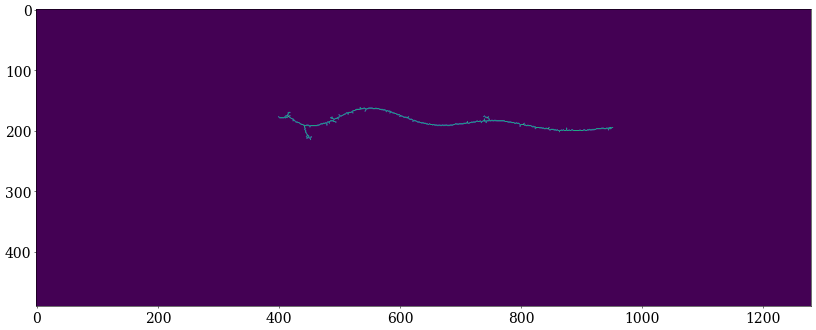

In [72]:
plt.figure()
plt.imshow(skeletons[45])

new_list = []

y_DSE, x_DSE = np.where(skeletons[45]!=0)

for x, y in zip(x_DSE, y_DSE):
    new_list.append((x, y))

new_list = sorted(new_list, key=lambda element: element[0])

x_DSE_sorted,y_DSE_sorted = [], []


for x, y in new_list:
    x_DSE_sorted.append(x)
    y_DSE_sorted.append(y)


x_interp = np.linspace(x_DSE_sorted[0], x_DSE_sorted[-1], 40)
y_interp = np.interp(x_interp, x_DSE_sorted, y_DSE_sorted)

In [ ]:
import os
import pandas as pd

already_processed = [data.replace('.csv','') for data in os.listdir('datos\\60mm\\centroid\\')]
# print(already_processed)

for filename in os.listdir('videos\\FCD\\P1\\telgopor\\'):
    video = cv.VideoCapture('videos\\FCD\\P1\\telgopor\\'+filename)
    lim = [0, 1280, 110, 600] #[xleft, xright, ytop, ydown]
    spl = filename[:-4].split('-')
    v,f = spl[1],spl[2]
    if f'{v}-{f}-centroid' not in already_processed:
        try:
            t,x,y,x_c,y_c,frame,blob = HeadTracker(video, lim, SHOW=False)
            # Guardo los datos
            if x.size>0 and y.size>0:
                pd.DataFrame().assign(t=t[:len(x)]).assign(x_centroid=x_c).assign(y_centroid=y_c).assign(frame=frame).to_csv(f'datos\\60mm\\centroid\\{v}-{f}-centroid.csv')
                print(f'guardado: {filename}')
            else:
                print("No data ", filename)
        except:
            print(f'No se pudo, archivo: {filename}')
    print('siguiente')

No se pudo, archivo: P1-1V-10Hz-60mm.mp4
siguiente


In [419]:
from natsort import natsorted
from scipy.optimize import curve_fit
f_lineal = lambda x,a,b: a*x + b
import os
import pandas as pd

In [462]:
#We prepare a dataframe of all our filenames and a dataframe of all our csv's
csv_names = natsorted([filepath for filepath in os.listdir('datos\\60mm\\centroid') if '.csv' in filepath])
filenamelist = pd.DataFrame().assign(name = csv_names)
df = [pd.read_csv(f'datos\\60mm\\centroid\\{f}') for f in filenamelist['name']]
print(df)

[     Unnamed: 0    t   x_centroid  y_centroid  frame
0             0    1  1273.536723  173.310734    147
1             1    2  1270.584104  174.970425    148
2             2    3  1268.161616  182.748918    149
3             3    4  1267.737052  191.232404    150
4             4    5  1266.222743  198.719812    151
..          ...  ...          ...         ...    ...
283         283  284    35.509116  192.594670    430
284         284  285    30.829971  187.289625    431
285         285  286    27.780172  177.906609    432
286         286  287    26.370803  168.759124    433
287         287  288    24.133824  160.601471    434

[288 rows x 5 columns],      Unnamed: 0    t   x_centroid  y_centroid  frame
0             0    1  1272.698980  212.589286    382
1             1    2  1270.619512  205.347967    383
2             2    3  1268.845404  197.165738    384
3             3    4  1263.991141  192.728682    385
4             4    5  1258.420420  198.388388    386
..          ...  ...

In [463]:
df_namelist = filenamelist[filenamelist['name'].str.contains('V')] #We get the filenames corresponding to the frequency chosen
filtered_namelist = df_namelist['name'] #We get the names of those files
print(filtered_namelist)

0     1V-5Hz-c.csv
1    1V-10Hz-c.csv
2    1V-15Hz-c.csv
3     2V-5Hz-c.csv
4    2V-10Hz-c.csv
5    2V-15Hz-c.csv
6     3V-5Hz-c.csv
7    3V-10Hz-c.csv
8     4V-5Hz-c.csv
Name: name, dtype: object


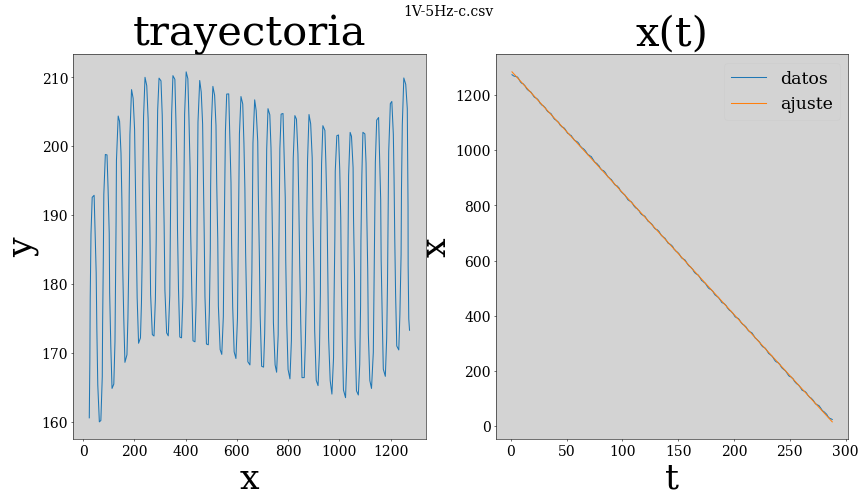

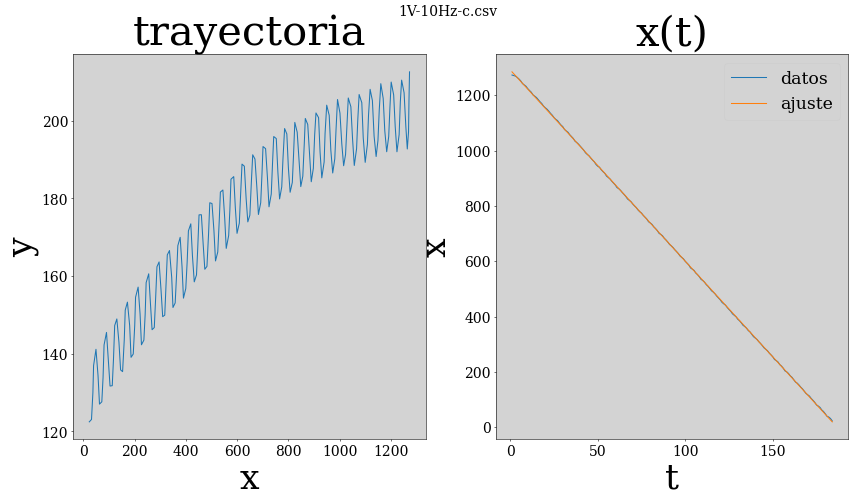

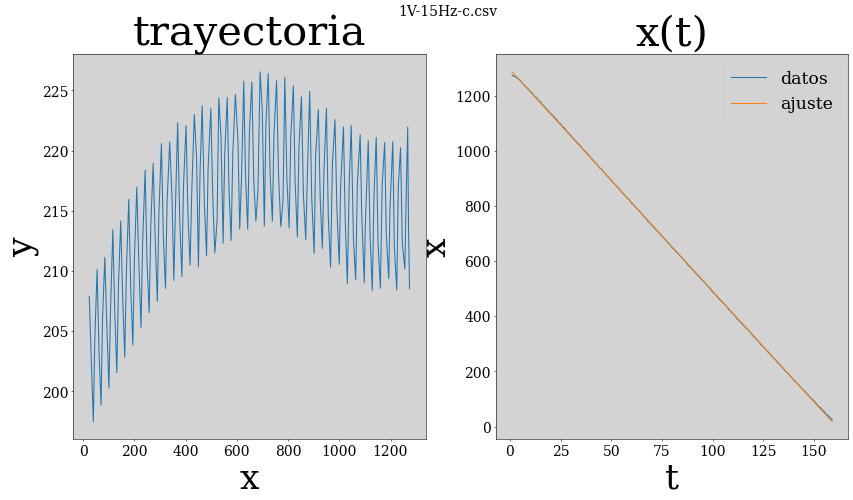

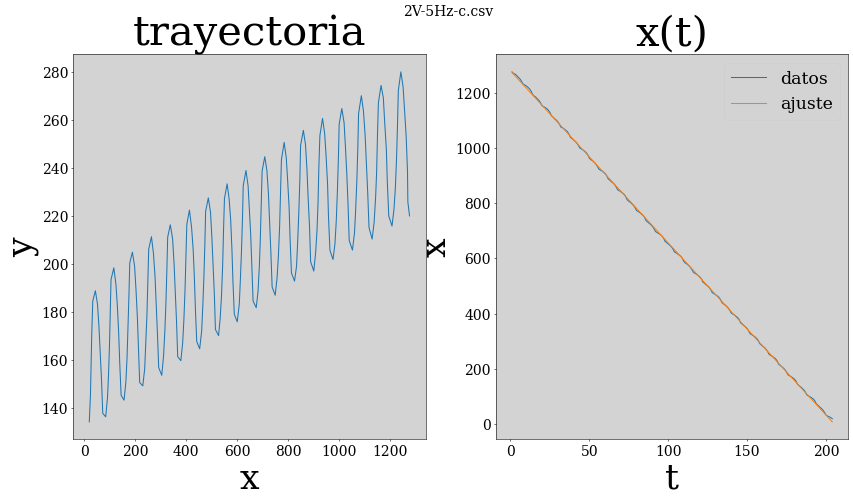

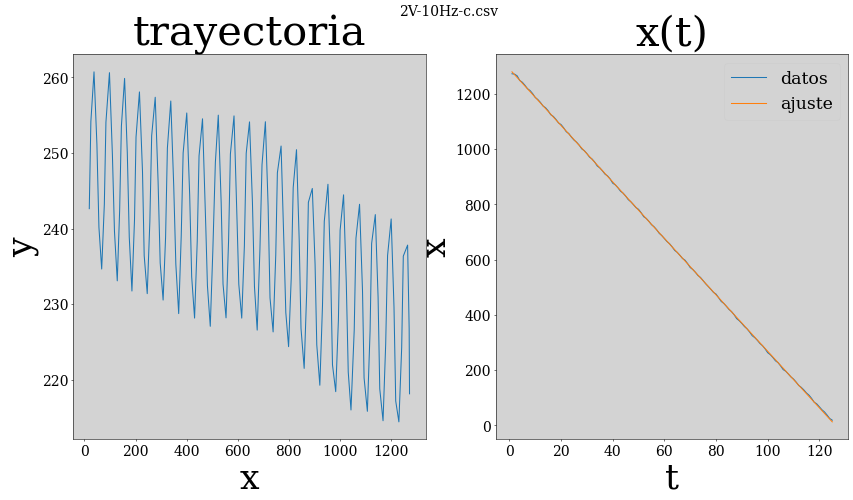

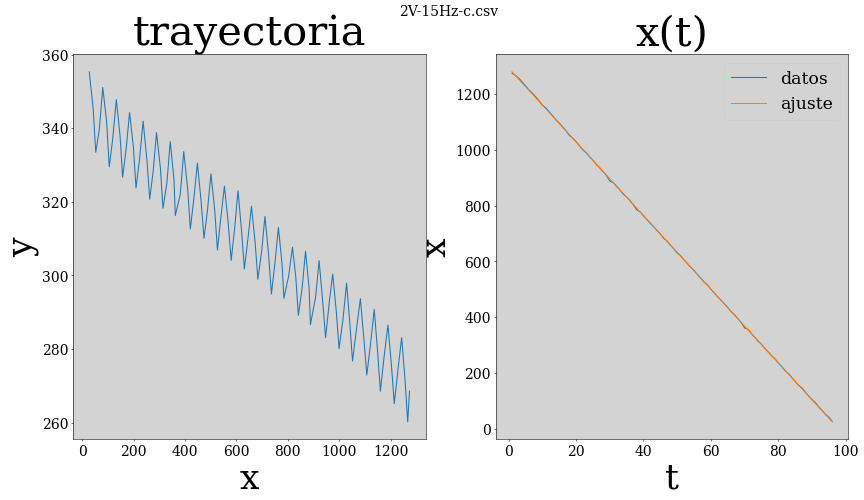

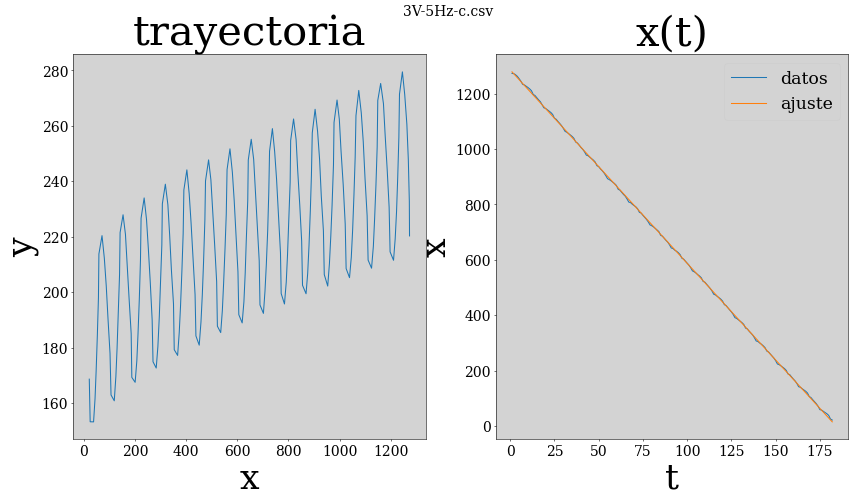

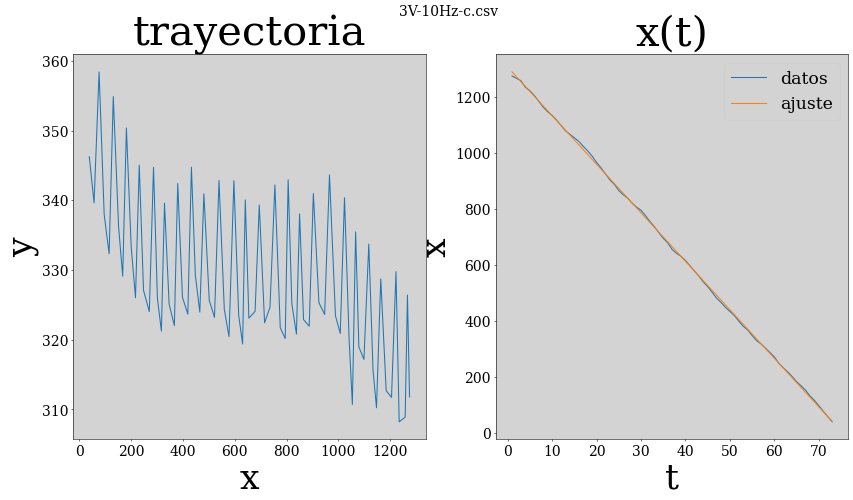

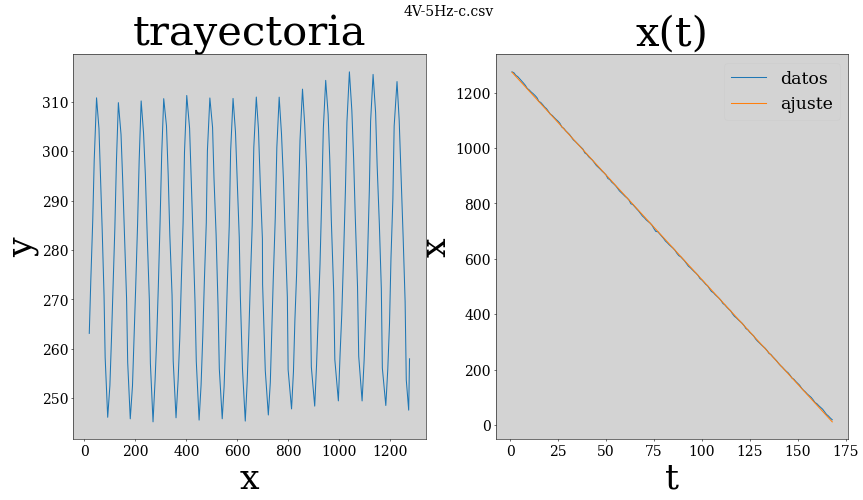

In [464]:
volt_list = []
frec_list = []
vel_list = []
vel_err_list = []
start_frame = []
end_frame = []

for i, filename in enumerate(filtered_namelist):
    
    df_txy = df[i] #We retrieve the dataframe corresponding to our current filename
    #We retrieve the metadata of our measurements from the filename

    s = filename.split('.')[0].split('-')
    v,f = s[0],s[1]
    vval = (float(v.split('V')[0].replace(',','.')))
    fval = float(f.split('Hz')[0].replace(',','.'))
    volt_list.append(vval)
    frec_list.append(fval)

    # #We retrieve the data from our dataframe
    t,x,y,frame = np.array(df_txy['t']), np.array(df_txy['x_centroid']), np.array(df_txy['y_centroid']), np.array(df_txy['frame'])
    frame = frame - 1
    start_frame.append(frame[0])
    end_frame.append(frame[-1])

    popt, popv = curve_fit(f_lineal, t, x)
    a, b = popt
    err_popt = np.sqrt(np.diag(popv))
    a_err, b_err = err_popt
    vel_list.append(a)
    vel_err_list.append(a_err)

    t_fit = np.linspace(t[0], t[-1], 1000)
    x_fit = f_lineal(t_fit, a, b)
    
    fig, [ax1, ax2] = plt.subplots(1,2, figsize = (20, 10))
    fig.suptitle(filename)
    ax1.plot(x, y)
    ax1.set_title('trayectoria')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    ax2.plot(t, x, label='datos')
    ax2.plot(t_fit, x_fit, label='ajuste')
    ax2.set_title('x(t)')
    ax2.set_xlabel('t')
    ax2.set_ylabel('x')
    ax2.legend()
    # popt, popv = curve_fit(f_lineal, t, x)
    # err_popt = np.sqrt(np.diag(popv))
    
    # volt_freq_map[popt[0]] = (vval,fval)

pd.DataFrame().assign(frec=frec_list).assign(volt=volt_list).assign(vel=vel_list).assign(vel_err=vel_err_list).assign(start_frame=start_frame).assign(end_frame=end_frame).to_csv(f'datos\\60mm\\centroid\\velocidades-c.csv')
